# Основная информация проекта

## Описание датасета

1. **Restaurant_id** — идентификационный номер ресторана / сети ресторанов;
2. **City** — город, в котором находится ресторан;
3. **Cuisine Style** — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
4. **Ranking** — место, которое занимает данный ресторан среди всех ресторанов своего города;
5. **Rating** — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
6. **Price Range** — диапазон цен в ресторане;
7. **Number of Reviews** — количество отзывов о ресторане;
8. **Reviews** — данные о двух отзывах, которые отображаются на сайте ресторана;
9. **URL_TA** — URL страницы ресторана на TripAdvisor;
10. **ID_TA** — идентификатор ресторана в базе данных TripAdvisor.

**Целевая переменная** - "Rating"

# Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

from sklearn.model_selection import train_test_split

In [2]:
RANDOM_SEED = 42
CURRENT_DATE = datetime.now()

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [4]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')
df_worldcities = pd.read_csv('worldcities.csv')

# Функции для обработки и анализа данных

In [5]:
def find_null(col):
    '''Функция подсчёта количества пустых значений в столбцах датасета'''
    empty_values = data[col].isna().sum()
    print(
        f"В столбце '{col}' количество пропусков = {empty_values}.")
    return empty_values

In [6]:
def last_date(x):
    '''Функция для определния последнего дня отзыва'''
    if len(x) > 0:
        return x[0]
    else:
        return 0

In [7]:
def row_to_datetime(row):
    '''Функция для преобразования данных в списке в формат даты'''
    new_row = []
    if len(row) > 0:
        for i in row:
            new_row.append(pd.to_datetime(i, errors='coerce'))
        return new_row
    else:
        return []

In [8]:
def delta_datetime(row):
    '''Функция подсчёта разницы между датами'''
    if len(row) == 2:
        return (row[0]-row[1]).days
    else:
        return 0

In [9]:
def parsing_all_columns_data(data):
    '''Функция для анализа всех столбцов на количество 
    уникальных значений и количество пропусков'''

    for col in data.columns:
        unique_values = len(data[col].value_counts())
        empty_values = data[col].isna().sum()
        print(
            f"В столбце '{col}' уникальных значений = {unique_values} ,а количество пропусков = {empty_values}.")
        print(
            f'Процент пропусков = {round(empty_values*100/data.shape[0],1)}%')

In [10]:
def review_to_date(review):
    pattern = re.compile('\'\d+\/\d+\/\d+\'?')
    dat = pattern.findall(review)
    datetime_list = []
    if len(dat) >= 2:        
        for date in dat:
            date = date[1:-1]
            dt = datetime.strptime(date, '%m/%d/%Y')
            datetime_list.append(dt)
        return datetime_list
    else:
        for date in dat:
            date = date[1:-1]
            dt = datetime.strptime(date, '%m/%d/%Y')
            datetime_list.append(dt)
        return datetime_list

In [11]:
def last_date(x):
    if len(x) > 0:
        return x[0]
    else:
        return 0

In [12]:
'''def days_count(date):
    if (date != 0) & type(date) !=:
        return (CURRENT_DATE - date).days
    elif type(date) == 'str':
        date = datetime.strptime(date, '%m/%d/%Y')
        return (CURRENT_DATE - date).days
    else:
        return 0'''
def days_count(date):
    if date != 0:
        return (CURRENT_DATE - date).days
    else:
        return 0

In [13]:
def delta_datetime(row):
    if len(row) == 2:
        return (row[0]-row[1]).days
    else:
        return 0

In [14]:
def rating(prediction):
        if prediction < 0.25:
            return 0
        elif 0.25 < prediction <= 0.75:
            return 0.5
        elif 0.75 < prediction <= 1.25:
            return 1
        elif 1.25 <prediction <= 1.75:
            return 1.5
        elif 1.75 < prediction <= 2.25:
            return 2
        elif 2.25 < prediction <= 2.75:
            return 2.5
        elif 2.75 < prediction <= 3.25:
            return 3
        elif 3.25 < prediction <= 3.75:
            return 3.5
        elif 3.75 < prediction <= 4.25:
            return 4
        elif 4.25 < prediction <= 4.75:
            return 4.5
        else:
            return 5

In [15]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['restaurant_id','id_ta',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    #df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    #df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

# Обзор данных

In [16]:
display(df_train.head(5))
df_train.info()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [17]:
display(df_test.head(5))
df_test.info()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [18]:
display(sample_submission.head(5))
sample_submission.info()

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [19]:
display(df_worldcities)
df_worldcities.info()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
40996,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
40997,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
40998,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
40999,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41001 entries, 0 to 41000
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        41001 non-null  object 
 1   city_ascii  41001 non-null  object 
 2   lat         41001 non-null  float64
 3   lng         41001 non-null  float64
 4   country     41001 non-null  object 
 5   iso2        40970 non-null  object 
 6   iso3        41001 non-null  object 
 7   admin_name  40902 non-null  object 
 8   capital     9483 non-null   object 
 9   population  40263 non-null  float64
 10  id          41001 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.4+ MB


In [20]:
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True)

In [21]:
# Оставим города с численностью населения больше 400к или где есть столица
df_worldcities = df_worldcities[(df_worldcities['population']>400000) | (~pd.isna(df_worldcities['capital']))]

In [22]:
data['Population'] = data['City'].map(df_worldcities.set_index('city_ascii').to_dict()['population'])
data['Capital'] = data['City'].map(df_worldcities.set_index('city_ascii').to_dict()['capital'])
data['Country'] = data['City'].map(df_worldcities.set_index('city_ascii').to_dict()['country'])

In [23]:
# Проверим города с пустым значением численности населения
data[pd.isna(data['Population'])]['City'].unique()

array(['Oporto'], dtype=object)

In [24]:
# Проверим наличие городка в датасети
df_worldcities[df_worldcities['city_ascii'] == 'Oporto']

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id


Возможно произошла ошибка в вводе данных и городо был добавлен неправильно (Oporto == Porto)

In [25]:
# Проверим наличие городка в датасети
df_worldcities[df_worldcities['city_ascii'] == 'Porto']

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
2434,Porto,Porto,41.1495,-8.6108,Portugal,PT,PRT,Porto,admin,237591.0,1620356810


In [26]:
# Заменим некорректное значение
data.replace('Oporto','Porto', inplace=True)

In [27]:
# Повторно добавим новые столбцы
data['Population'] = data['City'].map(df_worldcities.set_index('city_ascii').to_dict()['population'])
data['Capital'] = data['City'].map(df_worldcities.set_index('city_ascii').to_dict()['capital'])
data['Country'] = data['City'].map(df_worldcities.set_index('city_ascii').to_dict()['country'])

In [28]:
# Повторно проверим города с пустым значением численности населения
data[pd.isna(data['Population'])]['City'].unique()

array([], dtype=object)

In [29]:
display(data.head(5))
data.info()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Population,Capital,Country
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,11020000.0,primary,France
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,642045.0,primary,Finland
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,488050.0,NaN,United Kingdom
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,10979000.0,primary,United Kingdom
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,429564.0,primary,Slovakia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
 11  Population         50000 non-null  float64
 12  Capital            49255 non-null  object 
 13  Country            50000 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 5.3+ MB


In [30]:
# Вывод количества строк и столбцов таблицы
print(
    f'Датасет состоит из {data.shape[0]} строк и {data.shape[1]} столбцов')

Датасет состоит из 50000 строк и 14 столбцов


In [31]:
# Приведём наименования колонок в общий вид
data.columns = map(str.lower, data.columns.str.replace(' ','_',regex=True))

# Работа с данными

## 1. Обработка NAN

In [32]:
parsing_all_columns_data(data)

В столбце 'restaurant_id' уникальных значений = 13094 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'city' уникальных значений = 31 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'cuisine_style' уникальных значений = 10731 ,а количество пропусков = 11590.
Процент пропусков = 23.2%
В столбце 'ranking' уникальных значений = 12975 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'price_range' уникальных значений = 3 ,а количество пропусков = 17361.
Процент пропусков = 34.7%
В столбце 'number_of_reviews' уникальных значений = 1573 ,а количество пропусков = 3200.
Процент пропусков = 6.4%
В столбце 'reviews' уникальных значений = 41857 ,а количество пропусков = 2.
Процент пропусков = 0.0%
В столбце 'url_ta' уникальных значений = 49963 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'id_ta' уникальных значений = 49963 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'sample' уникальных значений = 2 ,а количество 

In [33]:
data['number_of_price_range_isnan'] = pd.isna(data['price_range']).astype('uint8')

In [34]:
data['number_of_price_range_isnan']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    1
49998    0
49999    0
Name: number_of_price_range_isnan, Length: 50000, dtype: uint8

In [35]:
display(data['price_range'].unique())
display(data['price_range'].value_counts())

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

Исходя из количества уникальных значений, можно сделать вывод, что самый распространенный диапозон цен = от 2-3. Заполним пропуски этим значением

In [36]:
data['price_range'].fillna('$$ - $$$', inplace=True)

In [37]:
data['number_of_reviews_isnan'] = pd.isna(data['number_of_reviews']).astype('uint8')

In [38]:
data['number_of_reviews_isnan']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: number_of_reviews_isnan, Length: 50000, dtype: uint8

In [39]:
# Заполним пропуски средним значением по городам и ценам
data['number_of_reviews'] = data.groupby(['city','price_range'])['number_of_reviews'].transform(
    lambda group: group.fillna(round(group.median())))

In [40]:
data['cuisine_style_isnan'] = pd.isna(data['cuisine_style']).astype('uint8')

In [41]:
data['cuisine_style_isnan']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: cuisine_style_isnan, Length: 50000, dtype: uint8

In [42]:
data['cuisine_style'] = data['cuisine_style'].apply(lambda x: eval(x) if not pd.isna(x) else 'Unknown')

In [43]:
display(data['capital'].unique())
display(data['capital'].value_counts())

array(['primary', nan, 'admin', 'minor'], dtype=object)

primary    33425
admin      12017
minor       3813
Name: capital, dtype: int64

Пустая строка, если не столица, в противном случае:
 * primary - столица страны (например, Вашингтон, округ Колумбия);
 * admin - административная столица первого уровня (например, Литл-Рок, штат Арканзас);
 * minor - административная столица нижнего уровня (например, Фейетвиль, штат Арканзас).

In [44]:
data['capital_isnan'] = pd.isna(data['capital']).astype('uint8')

In [45]:
data['capital'] = data['capital'].fillna(0)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [46]:
data.head(5)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,population,capital,country,number_of_price_range_isnan,number_of_reviews_isnan,cuisine_style_isnan,capital_isnan
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,11020000.0,primary,France,0,0,0,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,642045.0,primary,Finland,0,0,0,0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,488050.0,0,United Kingdom,0,0,0,1
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,10979000.0,primary,United Kingdom,0,0,0,0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,429564.0,primary,Slovakia,0,0,0,0


In [47]:
capital_dict = {'primary':1,'admin':2,'minor':3}
data['capital'] = data['capital'].map(lambda x: capital_dict.get(x,x))

In [48]:
value_price_dict = {'$':1,'$$ - $$$':2,'$$$$':3}
data['price_range'] = data['price_range'].map(lambda x: value_price_dict.get(x,x))

In [49]:
data['int_id_ta'] = data['id_ta'].str[1:].astype(float)

In [50]:
data['int_restaurant_id'] = data['restaurant_id'].str[3:].astype(float)

In [51]:
data['int_url_ta'] = data['url_ta'].str[20:26].astype(float)

In [52]:
data['reviews'] = data['reviews'].astype(str)
data['review_dates'] = data['reviews'].apply(review_to_date)

In [53]:
data['last_reviews_date'] = data['review_dates'].apply(last_date)

In [54]:
data['delta_datetime'] = data['review_dates'].apply(delta_datetime)

In [55]:
data['days_since_last_review'] = data['last_reviews_date'].apply(days_count)

In [56]:
data['cuisine_style_count'] = data['cuisine_style'].apply(len)

In [57]:
data['cuisine_style_mean_count'] = data['city'].map(data.groupby('city')['cuisine_style_count'].mean().to_dict())

In [58]:
data['ranking_mean_value'] = data['city'].map(data.groupby('city')['ranking'].mean().to_dict())

In [59]:
data['rests_in_city'] = data['city'].map(
       data.groupby(['city'])['int_restaurant_id'].count().to_dict())

In [60]:
data['rests_in_country'] = data['country'].map(
       data.groupby(['country'])['int_restaurant_id'].count().to_dict())

In [61]:
data['relative_ranking_by_city'] = data['ranking'] / data['rests_in_city']

In [62]:
data['relative_ranking_by_country'] = data['ranking'] / data['rests_in_country']

In [63]:
data['mean_number_of_reviews_by_city']  = data['city'].map(
    data.groupby(['city'])['number_of_reviews'].mean().to_dict())

In [64]:
data['mean_number_of_reviews_by_country']  = data['country'].map(
    data.groupby(['country'])['number_of_reviews'].mean().to_dict())

In [65]:
data['rests_per_population'] = data['rests_in_city'] / data['population']

In [66]:
data = pd.get_dummies(data, columns=['city',], dummy_na=True)

In [67]:
data = pd.get_dummies(data, columns=['country',], dummy_na=True)

In [68]:
cuisine_data = data[['cuisine_style']].copy()
cuisine_data = pd.get_dummies(cuisine_data['cuisine_style'].explode(), prefix = 'cuis').sum(level=0)
data = pd.concat([data,cuisine_data],axis=1)

In [69]:
chain_restaurant_list = list(data['restaurant_id'].value_counts()[data['restaurant_id'].value_counts() > 1].index)

In [70]:
data['chain_restaurant'] = data[data['restaurant_id'].isin(chain_restaurant_list)]['restaurant_id'].apply(lambda x: 1)
data['chain_restaurant'].fillna(0, inplace=True)

In [71]:
data.head(5)

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,cuis_Uzbek,cuis_Vegan Options,cuis_Vegetarian Friendly,cuis_Venezuelan,cuis_Vietnamese,cuis_Welsh,cuis_Wine Bar,cuis_Xinjiang,cuis_Yunnan,chain_restaurant
0,id_0,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,1,1,0,0,0,0,0,0,1.0
2,id_2,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,1,0,0,0,0,0,0,1.0
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,1,0,0,0,0,0,0,1.0
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,1,0,0,0,0,0,0,1.0


# EDA 

### Посмотрим распределение признака

<AxesSubplot:>

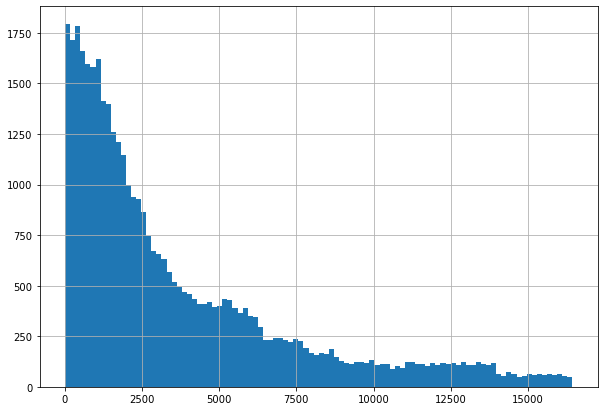

In [72]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

<AxesSubplot:>

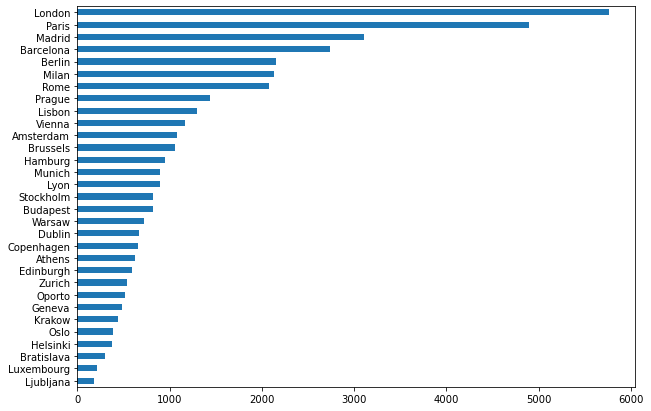

In [73]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

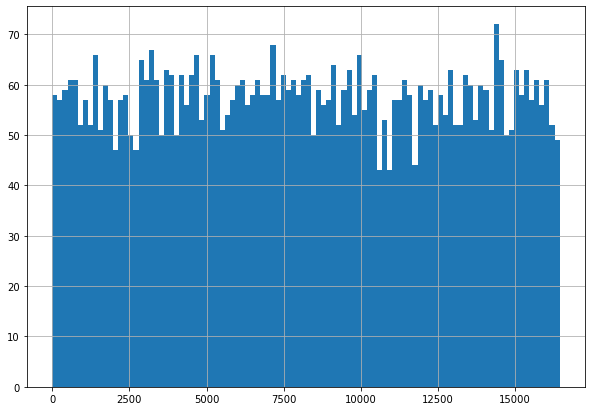

In [74]:
df_train['Ranking'][df_train['City']=='London'].hist(bins=100)

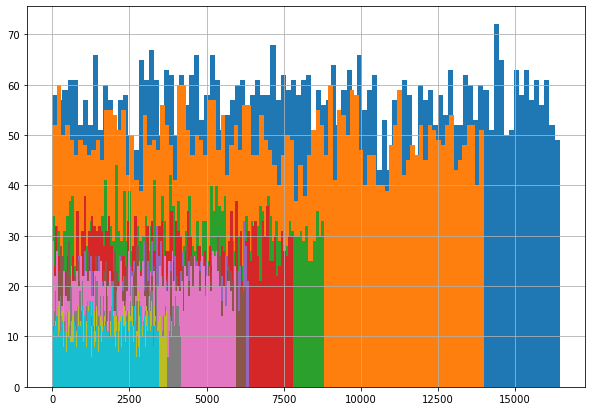

In [75]:
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City']==x].hist(bins=100)
plt.show()

### Посмотрим распределение целевой переменной

<AxesSubplot:>

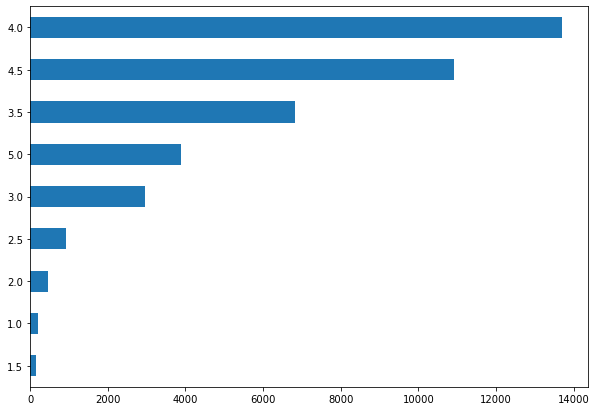

In [76]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

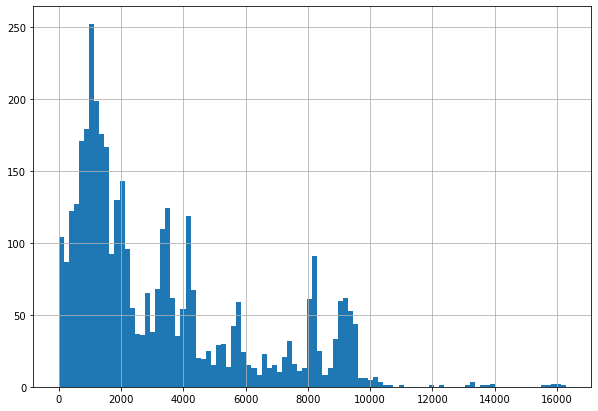

In [77]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

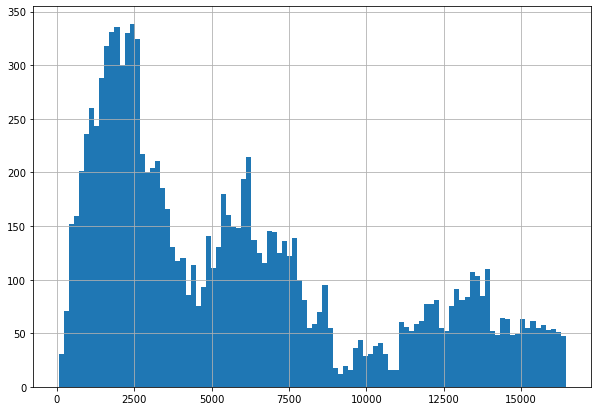

In [78]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

<AxesSubplot:>

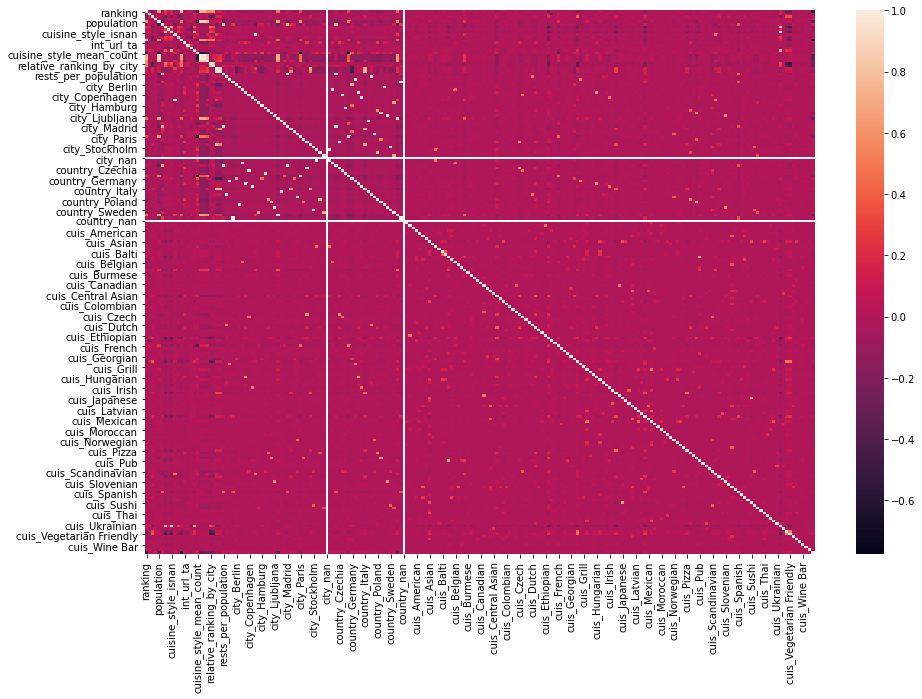

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(data.drop(['sample'],axis=1).corr(),)

# Data Preprocessing

In [80]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,ranking,price_range,number_of_reviews,sample,rating,population,capital,number_of_price_range_isnan,number_of_reviews_isnan,cuisine_style_isnan,...,cuis_Uzbek,cuis_Vegan Options,cuis_Vegetarian Friendly,cuis_Venezuelan,cuis_Vietnamese,cuis_Welsh,cuis_Wine Bar,cuis_Xinjiang,cuis_Yunnan,chain_restaurant
36196,1772.0,3,666.0,1,4.0,11020000.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
39685,421.0,1,29.0,1,4.5,1790658.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
37098,3587.0,2,90.0,1,4.0,11020000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3076,13888.0,2,5.0,0,0.0,10979000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
20712,965.0,2,6.0,1,4.5,1790658.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1.0
29872,3025.0,2,207.0,1,4.0,10979000.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
33616,3463.0,2,15.0,1,5.0,3644826.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1.0
31470,7504.0,2,28.0,1,4.5,11020000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
12808,4179.0,2,31.0,1,5.0,448016.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
3021,1193.0,2,9.0,0,0.0,1841179.0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,1.0


In [81]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

In [82]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [83]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 208), (40000, 208), (40000, 207), (32000, 207), (8000, 207))

# Model 
Сам ML

In [84]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [85]:
# Создаём модель
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [86]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

for i in range(y_pred.size):
    y_pred[i]=rating(y_pred[i])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [87]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1626875


In [88]:
y_pred

array([4.5, 5. , 4. , ..., 4.5, 4. , 4. ])

<AxesSubplot:>

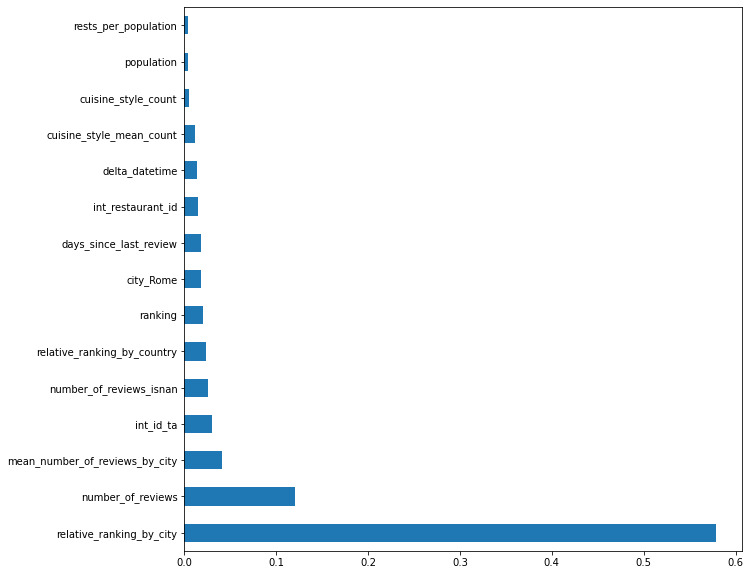

In [89]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission

In [90]:
test_data.sample(10)

,ranking,price_range,number_of_reviews,rating,population,capital,number_of_price_range_isnan,number_of_reviews_isnan,cuisine_style_isnan,capital_isnan,...,cuis_Uzbek,cuis_Vegan Options,cuis_Vegetarian Friendly,cuis_Venezuelan,cuis_Vietnamese,cuis_Welsh,cuis_Wine Bar,cuis_Xinjiang,cuis_Yunnan,chain_restaurant
1560,837.0,1,44.0,0.0,1911191.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
2953,68.0,1,595.0,0.0,237591.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3712,1400.0,2,46.0,0.0,516092.0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
4277,11078.0,2,16.0,0.0,11020000.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
8052,649.0,2,35.0,0.0,972647.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1210,11485.0,2,3.0,0.0,10979000.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
387,5635.0,2,7.0,0.0,11020000.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
6749,751.0,2,463.0,0.0,1335084.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
7629,1423.0,2,41.0,0.0,448016.0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
9485,5409.0,2,51.0,0.0,2872800.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [91]:
test_data = test_data.drop(['rating'], axis=1)

In [92]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [93]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [94]:
predict_submission

array([3.105, 4.13 , 4.435, ..., 3.03 , 4.47 , 4.31 ])

In [95]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.105
1,id_1,4.130
2,id_2,4.435
3,id_3,4.365
4,id_4,4.425
5,id_5,4.505
6,id_6,2.695
7,id_7,2.290
8,id_8,4.055
9,id_9,4.485
